In [3]:
import numpy as np
import matplotlib.pyplot as plt

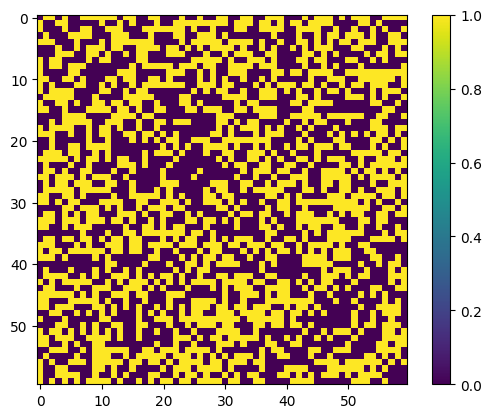

In [4]:
Weight_Matrix = np.load("HNNMAT.npy")
plt.imshow(Weight_Matrix);plt.colorbar()

In [45]:
load_workspace(vars(),'Problem0')

Loaded: Problem0, 


In [5]:
coulpingMatrix = - Problem0

In [6]:
numTrials = 100
numIterations = 1000  #predefined number of iterations
numSpins = coulpingMatrix.shape[0] # number of spins (Problem size N)

adpRate=0.01 # learning rate/step size
lamda = np.linspace(10,0,numIterations) # coefficient of initial Hamiltonian

spinVector = np.random.randint(2,size=(numSpins,numTrials))*2-1.0 #randomly initialize spin configurations
xVector = np.zeros((numSpins,numTrials)) #zero initialize classical "superposition"
momentum = np.zeros((numSpins,numTrials)) #zero initialize momentum
isingHamil = np.zeros(numTrials) # Ising Hamiltonian
isingHamilHistory = np.zeros((numIterations,numTrials)) # Ising Hamiltonian History

for ii in np.arange(numIterations):
    delHising = np.dot(-coulpingMatrix, spinVector) # Implemented experimentally by memristor crossbar array
    delHinit = xVector
    delHsystem = delHising + lamda[ii]*delHinit
    momentum = (1-adpRate)*momentum - adpRate*delHsystem # update momentum
    momentum = np.clip(momentum,-1,1) # clip momentum
    xVector += momentum # update classical "superposition"
    xVector = np.clip(xVector,-1,1 )# clip classical "superposition"
    spinVector = np.sign(xVector)
    for tt in np.arange(numTrials):  
        isingHamil[tt] = - 0.5*np.dot(spinVector[:,tt].T, (coulpingMatrix @ spinVector[:,tt]))
    isingHamilHistory[ii] = isingHamil
    
for tt in np.arange(numTrials):  
    isingHamil[tt] = - 0.5*np.dot(spinVector[:,tt].T, (coulpingMatrix @ spinVector[:,tt]))
    

sucProbability = np.sum(isingHamil == -188) / numTrials
print(sucProbability)

0.0
